In [ ]:
from google.colab import files

# Meminta pengguna untuk mengunggah file
uploaded = files.upload()

# Pastikan file kaggle.json ada di antara file yang diunggah
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Membuat direktori .kaggle dan memindahkan file token ke sana
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Mengunduh dataset McDonald's Store Reviews
!kaggle datasets download -d nelgiriyewithana/mcdonalds-store-reviews

import zipfile
import pandas as pd

# Ekstrak file zip
with zipfile.ZipFile('mcdonalds-store-reviews.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

# Muat file CSV ke dalam DataFrame
df = pd.read_csv('data/McDonald_s_Reviews.csv', encoding='latin1')


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes
Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/mcdonalds-store-reviews
License(s): other
  0% 0.00/1.78M [00:00<?, ?B/s]
100% 1.78M/1.78M [00:00<00:00, 837MB/s]


In [ ]:
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [ ]:
df.isnull().sum()

,0
reviewer_id,0
store_name,0
category,0
store_address,0
latitude,660
longitude,660
rating_count,0
review_time,0
review,0
rating,0


In [ ]:
# Ekstrak angka pertama dari kolom 'rating' dan ubah menjadi integer
df['rating'] = df['rating'].str.extract('(\d+)').astype(int)

# Cek hasilnya
print("Contoh rating setelah diubah:")
print(df['rating'].head())
print("\n Tipe data kolom rating sekarang:")
print(df.dtypes['rating'])

Contoh rating setelah diubah:
0    1
1    4
2    1
3    5
4    1
Name: rating, dtype: int64

 Tipe data kolom rating sekarang:
int64


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1837577869.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['rating'] = df['rating'].str.extract('(\d+)').astype(int)


In [ ]:
from datetime import datetime, timedelta

def parse_relative_time(time_str):
    now = datetime.now()
    time_str = time_str.lower()
    if 'days ago' in time_str:
        days = int(time_str.split(' ')[0])
        return now - timedelta(days=days)
    elif 'day ago' in time_str:
        return now - timedelta(days=1)
    elif 'weeks ago' in time_str:
        weeks = int(time_str.split(' ')[0])
        return now - timedelta(weeks=weeks)
    elif 'week ago' in time_str:
        return now - timedelta(weeks=1)
    elif 'months ago' in time_str:
        months = int(time_str.split(' ')[0])
        # Approximate months to 30 days for simplicity
        return now - timedelta(days=months*30)
    elif 'month ago' in time_str:
        return now - timedelta(days=30) # Approximate a month as 30 days
    elif 'years ago' in time_str:
        years = int(time_str.split(' ')[0])
        return now - timedelta(days=years*365) # Approximate a year as 365 days
    elif 'year ago' in time_str:
        return now - timedelta(days=365) # Approximate a year as 365 days
    elif 'just now' in time_str:
        return now
    else:
        return None # Return None for any unhandled format

# Apply the function to the 'review_time' column
df['review_time'] = df['review_time'].apply(parse_relative_time)

# Check the result
print("\n Contoh review_time setelah diubah:")
print(df['review_time'].head())
print("\n Tipe data kolom review_time sekarang:")
print(df.dtypes['review_time'])


 Contoh review_time setelah diubah:
0   2025-06-02 17:34:25.857930
1   2025-08-26 17:34:25.857943
2   2025-08-26 17:34:25.857947
3   2025-08-01 17:34:25.857949
4   2025-07-02 17:34:25.857951
Name: review_time, dtype: datetime64[ns]

 Tipe data kolom review_time sekarang:
datetime64[ns]


In [ ]:
print("Current columns in the DataFrame:")
print(df.columns)

columns_to_drop = ['reviewer_id', 'store_name', 'category', 'store_address', 'rating_count', 'latitude ', 'longitude']

# Filter out columns that are not in the DataFrame
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]

if columns_to_drop_existing:
    df.drop(columns=columns_to_drop_existing, inplace=True)
    print("\n DataFrame after dropping existing columns:")
    display(df.head())
else:
    print("\n None of the specified columns exist in the DataFrame.")

Current columns in the DataFrame:
Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

 DataFrame after dropping existing columns:


,review_time,review,rating
0,2025-06-02 17:34:25.857930,Why does it look like someone spit on my food?...,1
1,2025-08-26 17:34:25.857943,It'd McDonalds. It is what it is as far as the...,4
2,2025-08-26 17:34:25.857947,Made a mobile order got to the speaker and che...,1
3,2025-08-01 17:34:25.857949,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,2025-07-02 17:34:25.857951,"I repeat my order 3 times in the drive thru, a...",1


In [ ]:
display(df.head())
df.info()

,review_time,review,rating
0,2025-06-02 17:34:25.857930,Why does it look like someone spit on my food?...,1
1,2025-08-26 17:34:25.857943,It'd McDonalds. It is what it is as far as the...,4
2,2025-08-26 17:34:25.857947,Made a mobile order got to the speaker and che...,1
3,2025-08-01 17:34:25.857949,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,2025-07-02 17:34:25.857951,"I repeat my order 3 times in the drive thru, a...",1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_time  33389 non-null  datetime64[ns]
 1   review       33396 non-null  object        
 2   rating       33396 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 782.8+ KB


In [ ]:
# Membuat fungsi untuk menentukan sentimen
def to_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    else:
        return 'Negative'

# Terapkan fungsi tersebut untuk membuat kolom baru 'sentiment'
df['sentiment'] = df['rating'].apply(to_sentiment)

# Lihat distribusi sentimennya
print("\n Distribusi Sentimen:")
print(df['sentiment'].value_counts())


 Distribusi Sentimen:
sentiment
Negative    17335
Positive    16061
Name: count, dtype: int64


In [ ]:
# Install library Replicate
!pip install replicate

# Set API token Anda (tempel token yang sudah disalin)
import os
os.environ['REPLICATE_API_TOKEN'] = 'r1_8a7epID5SYzujAkPnRKNOeWcrsPkI0gKLa' (sedikit diubah untuk keamanan)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.4 MB/s eta 0:00:00


In [ ]:
import replicate

def classify_review_topic(review_text):
    """
    Fungsi untuk mengklasifikasikan topik ulasan negatif menggunakan IBM Granite.
    """
    # Prompt ini adalah instruksi kita untuk AI
    prompt = f"""
    You are an expert analyst for McDonald's. Classify the following customer review into ONLY ONE of the following categories:
    [Food Quality, Service Speed, Staff Attitude, Cleanliness, Price, Order Accuracy, Other]

    Review: "{review_text}"

    Category:
    """

    # Memanggil model IBM Granite di Replicate
    output = replicate.run(
        "ibm-granite/granite-3.2-8b-instruct",
        input={
            "prompt": prompt,
            "max_new_tokens": 20  # Kita hanya butuh output nama kategori, jadi tidak perlu panjang
        }
    )

    # Menggabungkan hasil output dari AI menjadi satu teks
    full_response = "".join(output)
    return full_response.strip()

In [ ]:
# Ambil 3 ulasan negatif secara acak
sample_reviews = df[df['sentiment'] == 'Negative']['review'].sample(3).tolist()

# Lakukan klasifikasi untuk setiap ulasan
for review in sample_reviews:
    topic = classify_review_topic(review)
    print(f"Review: {review[:100]}...") # Tampilkan 100 karakter pertama
    print(f"--> AI Classification: {topic}\n")

Review: Slowest service ever. Dirty store. 12 employees working with lack of customer service skills. Big ro...
--> AI Classification: Service Speed, Cleanliness, Staff Attitude

Explanation:

The review primarily focuses on three areas:

1. Service Speed: The customer mentions "Slowest service ever," indicating dissatisfaction with the time it took to receive their order.

2. Cleanliness: The review mentions a "Dirty store" and a "Big roach walking around lobby area," highlighting concerns about the cleanliness of the restaurant.

3. Staff Attitude: Although not explicitly stated, the phrase "lack of customer service skills" implies a problem with the staff's attitude or professionalism.

While the review touches upon aspects of cleanliness and service speed, it does not directly address food quality, order accuracy, price, or other specific areas not already mentioned. Therefore, it fits best into the categories of Service Speed, Cleanliness, and Staff Attitude.

Review: Trash was ov

In [ ]:
# Install library untuk progress bar
!pip install tqdm

from tqdm.auto import tqdm

# Memberitahu pandas untuk menggunakan tqdm agar ada progress bar
tqdm.pandas()

# 1. Buat DataFrame baru yang hanya berisi ulasan negatif
df_negative = df[df['sentiment'] == 'Negative'].copy()

# 2. Ambil sampel acak sebanyak 500 ulasan
# random_state=42 memastikan kita mendapatkan sampel yang sama jika kode dijalankan ulang
df_sample = df_negative.sample(n=500, random_state=42)

# 3. Terapkan fungsi AI pada sampel. Ini akan memakan waktu beberapa menit.
# progress_apply akan menampilkan progress bar
print("Memulai klasifikasi topik untuk 500 ulasan negatif. Proses ini mungkin memakan waktu 5-10 menit...")
df_sample['topic'] = df_sample['review'].progress_apply(classify_review_topic)

print("\n Proses klasifikasi selesai!")

Memulai klasifikasi topik untuk 500 ulasan negatif. Proses ini mungkin memakan waktu 5-10 menit...


  0%|          | 0/500 [00:00<?, ?it/s]


 Proses klasifikasi selesai!


In [ ]:
# Tampilkan hasil perhitungan topik keluhan
print("\n Distribusi Topik Keluhan dari 500 Ulasan Negatif:")
topic_counts = df_sample['topic'].value_counts()
print(topic_counts)


 Distribusi Topik Keluhan dari 500 Ulasan Negatif:
topic
Staff Attitude                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             54
Food Quality                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
# Daftar kategori bersih kita
CLEAN_CATEGORIES = ['Food Quality', 'Service Speed', 'Staff Attitude', 'Cleanliness', 'Price', 'Order Accuracy', 'Other']

def clean_ai_topic(topic_string):
    """
    Membersihkan output AI yang 'bertele-tele'.
    """
    for category in CLEAN_CATEGORIES:
        if category.lower() in topic_string.lower(): # Cek jika nama kategori ada di dalam string
            return category
    return 'Other' # Jika tidak ada, anggap 'Other'

# Terapkan fungsi pembersihan ini untuk membuat kolom baru
df_sample['topic_cleaned'] = df_sample['topic'].apply(clean_ai_topic)

# SEKARANG, LIHAT HASIL YANG SUDAH BERSIH!
final_counts = df_sample['topic_cleaned'].value_counts()
print("Distribusi Topik Setelah Dibersihkan:")
print(final_counts)

Distribusi Topik Setelah Dibersihkan:
topic_cleaned
Food Quality      183
Service Speed     122
Staff Attitude     82
Cleanliness        38
Order Accuracy     35
Other              32
Price               8
Name: count, dtype: int64


/tmp/ipython-input-249952730.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_counts.values, y=final_counts.index, palette='viridis', orient='h')


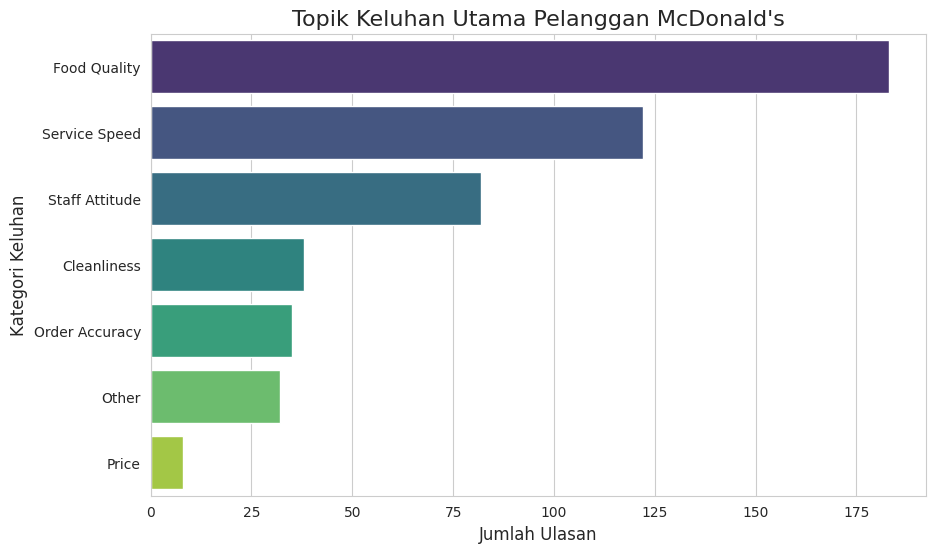

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style visualisasi
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Buat bar plot horizontal
sns.barplot(x=final_counts.values, y=final_counts.index, palette='viridis', orient='h')

# Beri judul dan label
plt.title('Topik Keluhan Utama Pelanggan McDonald\'s', fontsize=16)
plt.xlabel('Jumlah Ulasan', fontsize=12)
plt.ylabel('Kategori Keluhan', fontsize=12)

# Simpan gambar untuk slide presentasi Anda
plt.savefig('grafik_keluhan_pelanggan.png', bbox_inches='tight')

# Tampilkan grafik
plt.show()

/tmp/ipython-input-3846267924.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_series.values, y=grouped_series.index, palette='plasma', orient='h')


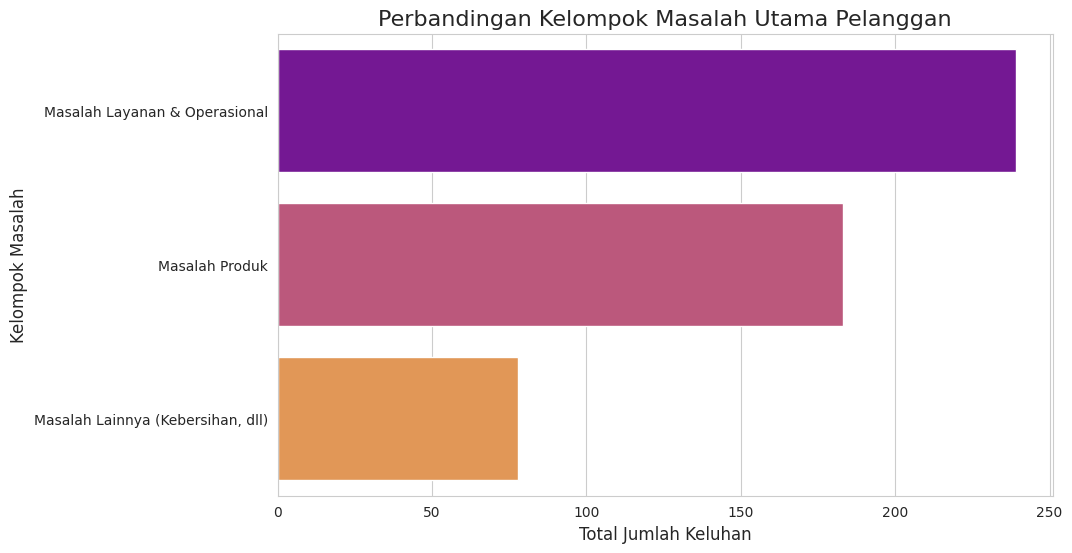

Total Masalah Layanan & Operasional: 239
Total Masalah Produk: 183


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsi Anda sudah memiliki variabel 'final_counts' dari langkah sebelumnya
# final_counts = df_sample['topic_cleaned'].value_counts()
# Contoh:
# Food Quality      183
# Service Speed     122
# Staff Attitude     82
# Cleanliness        38
# Order Accuracy     35
# Other              32
# Price               8

# Langkah 1: Kelompokkan kategori dan jumlahkan nilainya
product_issues_total = final_counts.get('Food Quality', 0)

service_issues_total = final_counts.get('Service Speed', 0) + \
                       final_counts.get('Staff Attitude', 0) + \
                       final_counts.get('Order Accuracy', 0)

other_issues_total = final_counts.get('Cleanliness', 0) + \
                     final_counts.get('Other', 0) + \
                     final_counts.get('Price', 0)

# Langkah 2: Buat data baru untuk plotting
grouped_data = {
    'Masalah Layanan & Operasional': service_issues_total,
    'Masalah Produk': product_issues_total,
    'Masalah Lainnya (Kebersihan, dll)': other_issues_total
}

# Ubah menjadi Pandas Series agar mudah di-plot dan diurutkan
grouped_series = pd.Series(grouped_data).sort_values(ascending=False)

# Langkah 3: Buat visualisasi final
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.barplot(x=grouped_series.values, y=grouped_series.index, palette='plasma', orient='h')

plt.title('Perbandingan Kelompok Masalah Utama Pelanggan', fontsize=16)
plt.xlabel('Total Jumlah Keluhan', fontsize=12)
plt.ylabel('Kelompok Masalah', fontsize=12)

# Simpan gambar final untuk presentasi
plt.savefig('grafik_final_insight.png', bbox_inches='tight')

plt.show()

print("Total Masalah Layanan & Operasional:", service_issues_total)
print("Total Masalah Produk:", product_issues_total)